In [1]:
from importMag import *
%matplotlib inline

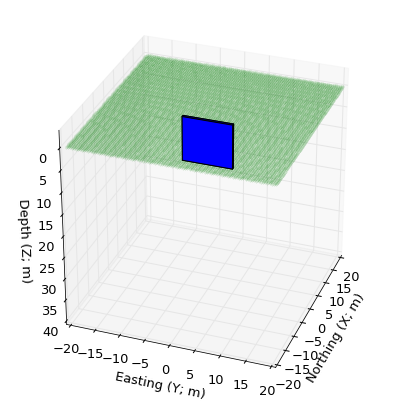

In [2]:
dx, dy, dz, depth = 0.5, 10., 10., 1.
prism=ViewPrismSurvey(dx, dy, dz, depth)
display(prism)

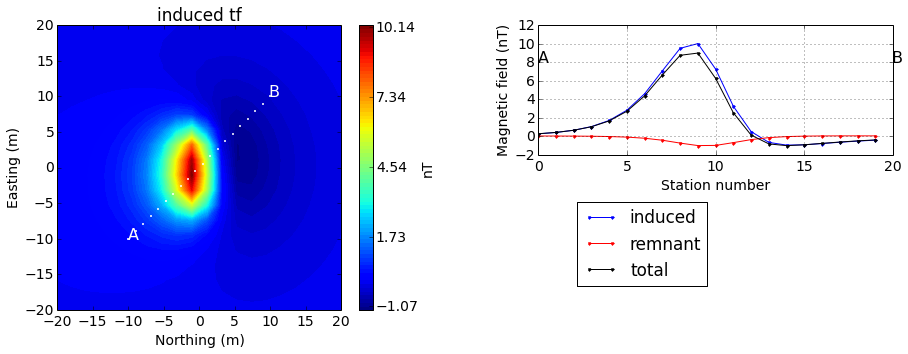

In [3]:
display(ViewMagSurvey2DInd(prism))